In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
import numpy as np

#Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")
import textwrap 

In [2]:
#Importando base de dados
df = pd.read_csv('C:/Users/Ricardo/cimatec/tcc/final/texto_birads_nao_balanceado.csv')

# Análise Exploratória dos Dados

In [3]:
#Dados estatisticos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        7433 non-null   int64 
 1   texto_do_laudo_3  7433 non-null   object
 2   birads            7433 non-null   object
 3   Category_Code     7433 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 232.4+ KB


In [4]:
#Criando dataset somenta para variaveis necessarias
df = df[['texto_do_laudo_3','birads']]

In [5]:
#Observando variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   texto_do_laudo_3  7433 non-null   object
 1   birads            7433 non-null   object
dtypes: object(2)
memory usage: 116.3+ KB


In [6]:
#Visualizando dados
df.head()

,texto_do_laudo_3,birads
0,ressonancia magnetica mamaria indicacao clini...,categoria 2
1,ressonancia magnetica mamaria indicacao clini...,categoria 3
2,ressonancia magnetica mamaria indicacao clini...,categoria 3
3,ressonancia magnetica mamaria indicacao clinic...,categoria 3
4,ressonancia magnetica mamaria indicacao clini...,categoria 3


## Número de laudos por birads

In [7]:
#Quantificando valores para as classes
df.birads.value_counts()

categoria 2     3387
categoria 3     1115
categoria 4      971
categoria 6      723
categoria 1      586
categoria 5      352
categoria 4a     280
categoria 0       10
categoria 4c       9
Name: birads, dtype: int64

In [8]:
#Verificando percentuais de laudos por classes
df2 = pd.DataFrame(df.groupby('birads').count()['texto_do_laudo_3']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('birads'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% de Laudos')),
    color='birads'
).transform_window(
    TotalArticles='sum(texto_do_laudo_3)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.texto_do_laudo_3 / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Percentual de laudos para cada categoria",
)

alt.LayerChart(...)

## Análise sobre o tamanho dos laudos

In [9]:
#Contando palavras
qtde_palavras = df['texto_do_laudo_3']

test = pd.DataFrame(qtde_palavras)
test.columns = ["Texto do Laudo"]

length_of_the_messages = test["Texto do Laudo"].str.split("\\s+")

print(length_of_the_messages)
print("Max number of words = ", length_of_the_messages.str.len().max())
print("Min number of words = ", length_of_the_messages.str.len().min())
print("Mean number of words = ", length_of_the_messages.str.len().mean())
print("Index = ", length_of_the_messages.str.len().idxmax())
print("Index = ", length_of_the_messages.str.len().idxmin())

0       [, ressonancia, magnetica, mamaria, indicacao,...
1       [, ressonancia, magnetica, mamaria, indicacao,...
2       [, ressonancia, magnetica, mamaria, indicacao,...
3       [ressonancia, magnetica, mamaria, indicacao, c...
4       [, ressonancia, magnetica, mamaria, indicacao,...
                              ...                        
7428    [, ressonancia, magnetica, mamaria, indicacao,...
7429    [, ressonancia, magnetica, mamaria, indicacao,...
7430    [, ressonancia, magnetica, mamaria, indicacao,...
7431    [, ressonancia, magnetica, mamaria, indicacao,...
7432    [, ressonancia, magnetica, mamaria, indicacao,...
Name: Texto do Laudo, Length: 7433, dtype: object
Max number of words =  484
Min number of words =  130
Mean number of words =  201.86990448002152
Index =  3893
Index =  6090


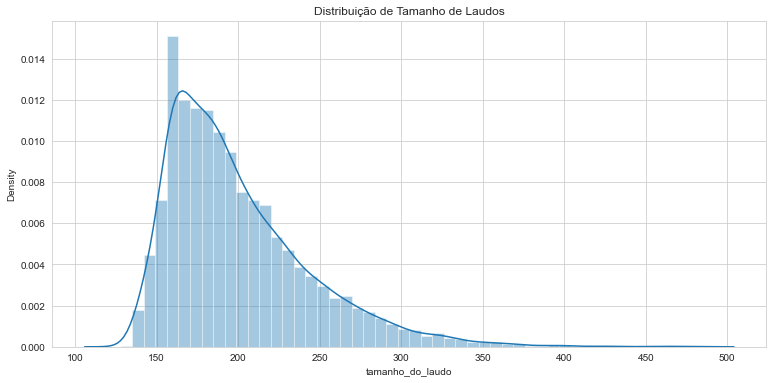

In [10]:
#Verificando tamanho de laudo por palavras existentes
df['tamanho_do_laudo'] =  [len(sentence.split()) for sentence in df['texto_do_laudo_3']]
plt.figure(figsize=(12.8,6))
sns.distplot(df['tamanho_do_laudo']).set_title('Distribuição de Tamanho de Laudos');

In [11]:
#Media de palavras por categoria
df_count_words = (df.groupby('birads')['texto_do_laudo_3']
                            .apply(lambda x: np.mean(x.str.len()))
                            .reset_index(name='mean_len_text'))
print (df_count_words)

         birads  mean_len_text
0   categoria 0    2312.700000
1   categoria 1    1310.266212
2   categoria 2    1598.997343
3   categoria 3    1827.543498
4   categoria 4    2066.027806
5  categoria 4a    1665.725000
6  categoria 4c    1941.666667
7   categoria 5    2014.340909
8   categoria 6    1857.266943


In [12]:
#Verificando dados estatisticos
df['tamanho_do_laudo'].describe()

count    7433.000000
mean      200.051258
std        43.800884
min       128.000000
25%       167.000000
50%       189.000000
75%       222.000000
max       482.000000
Name: tamanho_do_laudo, dtype: float64

In [16]:
#Número de laudos com mais de 500 palavras
df_more500 = df[df['tamanho_do_laudo'] > 400]
len(df_more500)

13

**Distribuição do tamanho dos laudos por classe**

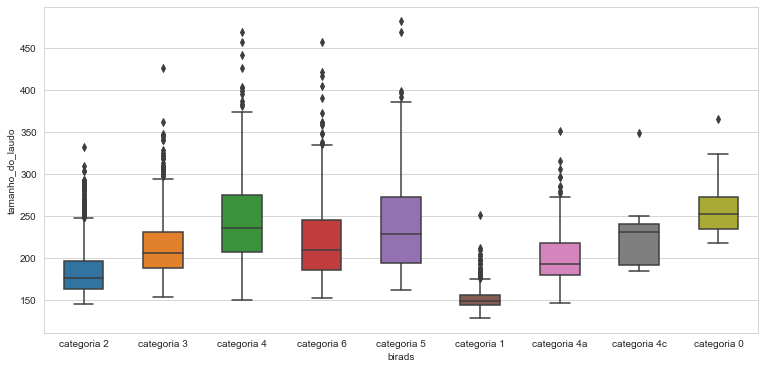

In [17]:
#df principal
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='birads', y='tamanho_do_laudo', width=.5);

## Engenharia de Atributos

In [18]:
#importando bibliotecas
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np
import string

## 2. Codificação dos rótulos

In [19]:
#Criando variavel para mapeamento de categorias
category_codes = {
    #'sem categoria': 999,
    'categoria 0': 0,
    'categoria 1': 1,
    'categoria 2': 2,
    'categoria 3': 3,
    'categoria 4': 4,
    'categoria 4a': 41,
    'categoria 4b': 42,
    'categoria 4c': 43,
    'categoria 5': 5,
    'categoria 6': 6
}

In [20]:
#Mapeamento das categorias
df['Category_Code'] = df['birads']
df = df.replace({'Category_Code':category_codes})

In [21]:
#Verificando quantidade de registros
df.Category_Code.value_counts()

2     3387
3     1115
4      971
6      723
1      586
5      352
41     280
0       10
43       9
Name: Category_Code, dtype: int64

In [22]:
#Transformando variavel em numeric
df["Category_Code"] = pd.to_numeric(df["Category_Code"])

## 3.  Divisão de conjuntos de treinamento e teste

In [23]:
#Dividindo conjuntos
X_train, X_test, y_train, y_test = train_test_split(df['texto_do_laudo_3'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=1)

In [24]:
y_train.value_counts()

2     2854
3      958
4      826
6      608
1      502
5      306
41     245
0       10
43       9
Name: Category_Code, dtype: int64

### TF-IDF

In [32]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = None

In [33]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(6318, 6639)
(1115, 6639)


In [34]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'categoria 0' category:
  . Most correlated unigrams:
. impregnacao
. possibilidade
. eventual
. correlacao
. direcionado
  . Most correlated bigrams:
. ecografico direcionado
. corresponder linfonodo

# 'categoria 1' category:
  . Most correlated unigrams:
. obteve
. triagem
. expressao
. mamario
. negativo
  . Most correlated bigrams:
. negativo birads
. diagnostica exame

# 'categoria 2' category:
  . Most correlated unigrams:
. nodulo
. suspeitas
. irregular
. distando
. papila
  . Most correlated bigrams:
. suspeitas birads
. negativo lesoes

# 'categoria 3' category:
  . Most correlated unigrams:
. caracteristicas
. lento
. progressivo
. provavelmente
. benignas
  . Most correlated bigrams:
. caracteristicas provavelmente
. provavelmente benignas

# 'categoria 4' category:
  . Most correlated unigrams:
. fase
. prosseguimento
. rapido
. tendencia
. plato
  . Most correlated bigrams:
. plato tardio
. tendencia plato

# 'categoria 4a' category:
  . Most correlated unigrams:
. irr

## 5. Seleção de Atributos

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=300)
features_train = selector.fit_transform(features_train, labels_train)
features_test = selector.transform(features_test)

print(features_train.shape)
print(features_test.shape)

(6318, 300)
(1115, 300)


# Criação do Modelo

In [36]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer

score_metrics = {'F1': 'f1_macro', 'Accuracy': make_scorer(accuracy_score)}

df_estimators_scores = pd.DataFrame(columns=['Estimator', 'Cross-validation Scores', 'Test Set Scores'])
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores


## 1. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

### 1.1. Ajuste de Parâmetros

In [38]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


**Randomized Search Cross Validation**

In [39]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [40]:
# Criando modelo base para ajuste
rfc = RandomForestClassifier(random_state=8)

# Definição de random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=5,
                                   scoring=score_metrics,
                                   refit='F1',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs =2)

# Fit modelo random search
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=5, n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, refit='F1',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': 'f1_macro'},
                   verbose=1)

In [41]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}

A macro F1 obtida com esses hiperparâmetros é:
0.619512142579529


In [42]:
random_search.cv_results_

{'mean_fit_time': array([5.59958442, 5.73881896, 9.7973431 , 8.91146612, 6.81868951]),
 'std_fit_time': array([0.17358899, 0.09806791, 0.06406216, 0.52761936, 0.02944613]),
 'mean_score_time': array([0.18223858, 0.19782925, 0.34521397, 0.22353609, 0.26279688]),
 'std_score_time': array([0.00736441, 0.00736508, 0.01867348, 0.03231038, 0.04085325]),
 'param_n_estimators': masked_array(data=[400, 400, 800, 400, 400],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 2, 10, 10, 2],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 4, 4, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'sqrt', 'sqrt'],
              mask=[False, False, False, False, 

**Grid Search Cross Validation**

In [49]:
# Criando grade de parametros

bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Criando modelo base
rfc = RandomForestClassifier(random_state=8)

# Criando manualmente as divisões no CV para corrigir random_state
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instanciando modelo grid search
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1, n_jobs =2)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=8), n_jobs=2,
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [800]},
             scoring='accuracy', verbose=1)

In [50]:
print("Os melhores hiperparâmetros encontrados com o Grid Search são:")
print(grid_search.best_params_)
print("")
print("A acurácia média obtida com esses hiperparâmetros é:")
print(grid_search.best_score_)

Os melhores hiperparâmetros encontrados com o Grid Search são:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

A acurácia média obtida com esses hiperparâmetros é:
0.8693844924060752


In [51]:
results = random_search.cv_results_

In [52]:
best_rfc = random_search.best_estimator_ 
best_rfc

RandomForestClassifier(max_depth=40, max_features='sqrt', n_estimators=400,
                       random_state=8)

### 1.2. Treinamento e avaliação do modelo

In [53]:
best_scorer_index = np.nonzero(results['rank_test_F1'] == 1)[0][0]
best_scorer_index

4

In [54]:
best_rfc.fit(features_train, labels_train)
rfc_pred = best_rfc.predict(features_test)

              precision    recall  f1-score   support

           1       0.96      0.92      0.94        84
           2       0.92      0.96      0.94       533
           3       0.87      0.80      0.83       157
           4       0.79      0.82      0.81       145
           5       0.59      0.22      0.32        46
           6       0.77      0.90      0.83       115
          41       0.85      0.83      0.84        35

    accuracy                           0.88      1115
   macro avg       0.82      0.78      0.79      1115
weighted avg       0.87      0.88      0.87      1115



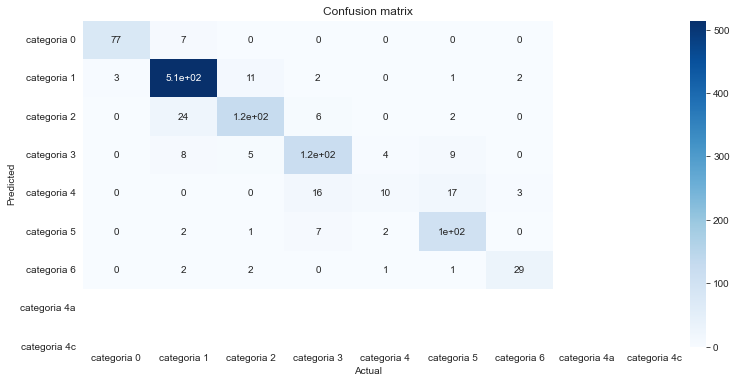

In [55]:
acc = accuracy_score(labels_test, rfc_pred)
f1 = f1_score(labels_test, rfc_pred, average='macro')
print(classification_report(labels_test,rfc_pred))

aux_df = df[['birads', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['birads'].values, 
            yticklabels=aux_df['birads'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [56]:
print("Cross-validation scores")
print("F1: %.3f - Accuracy: %.3f " % (results['mean_test_F1'][best_scorer_index], results['mean_test_Accuracy'][best_scorer_index]))
print('---------------------------')
print("Test scores")
print("F1: %.3f - Accuracy: %.3f " % (f1, acc))

Cross-validation scores
F1: 0.620 - Accuracy: 0.867 
---------------------------
Test scores
F1: 0.787 - Accuracy: 0.876 


In [57]:
d = {
     'Estimator': 'Random Forest',
     'Cross-validation Scores': (round(results['mean_test_F1'][best_scorer_index],3), round(results['mean_test_Accuracy'][best_scorer_index],3)),
     'Test Set Scores': (round(f1,3), round(acc,3))
}

df_estimators_scores = df_estimators_scores.append(d, ignore_index=True)

In [58]:
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.62, 0.867)","(0.787, 0.876)"


## 2. Support Vector Machine

In [59]:
from sklearn import svm

### 2.1. Ajuste de Parâmetros

In [60]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [61]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


**Randomized Search Cross Validation**

In [62]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=5,
                                   scoring=score_metrics,
                                   refit='F1',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=8), n_iter=5, n_jobs=2,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   random_state=8, refit='F1',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': 'f1_macro'},
                   verbose=1)

In [47]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

A macro F1 obtida com esses hiperparâmetros é:
0.40215649032817774


In [63]:
results = random_search.cv_results_

best_svm = random_search.best_estimator_ 
best_svm

SVC(C=0.01, degree=4, gamma=10, kernel='poly', probability=True, random_state=8)

In [64]:
results

{'mean_fit_time': array([20.56275455, 21.31096959, 28.18799798, 21.63519708, 17.83218924]),
 'std_fit_time': array([0.58377461, 0.91687302, 2.74588534, 1.56300182, 2.21517831]),
 'mean_score_time': array([1.94023657, 2.18114662, 3.54905208, 1.81650766, 1.57610003]),
 'std_score_time': array([0.09755084, 0.34204912, 0.22839075, 0.12129092, 0.37510042]),
 'param_probability': masked_array(data=[True, True, True, True, True],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['poly', 'linear', 'rbf', 'poly', 'poly'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 0.0001, 0.0001, 10, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_degree': masked_array(data=[4, 3, 4, 4, 1],
              mask=[False, False, False, False, Fals

### 2.2. Treinamento e avaliação do modelo

In [65]:
best_scorer_index = np.nonzero(results['rank_test_F1'] == 1)[0][0]
best_scorer_index

3

In [66]:
best_svm.fit(features_train, labels_train)
svm_pred = best_svm.predict(features_test)

In [67]:
acc = accuracy_score(labels_test, svm_pred)
f1 = f1_score(labels_test, svm_pred, average='macro')
print(classification_report(labels_test,svm_pred))

              precision    recall  f1-score   support

           1       1.00      0.60      0.75        84
           2       0.64      0.99      0.78       533
           3       0.95      0.39      0.56       157
           4       0.56      0.35      0.43       145
           5       0.46      0.13      0.20        46
           6       0.84      0.37      0.52       115
          41       0.67      0.29      0.40        35

    accuracy                           0.67      1115
   macro avg       0.73      0.45      0.52      1115
weighted avg       0.71      0.67      0.64      1115



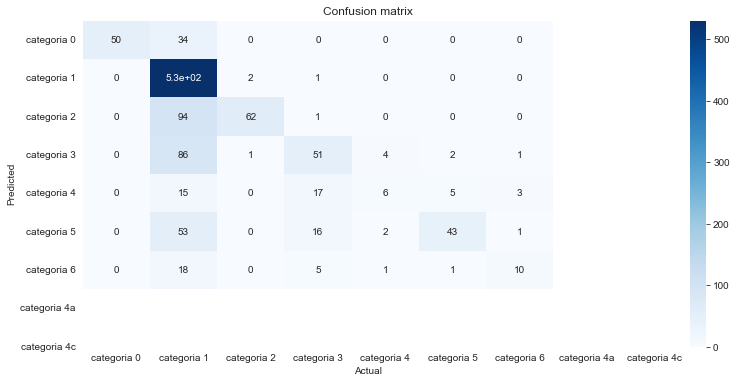

In [53]:
aux_df = df[['birads', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, svm_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['birads'].values, 
            yticklabels=aux_df['birads'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [68]:
print("Cross-validation scores")
print("F1: %.3f - Accuracy: %.3f " % (results['mean_test_F1'][best_scorer_index], results['mean_test_Accuracy'][best_scorer_index]))
print('---------------------------')
print("Test scores")
print("F1: %.3f - Accuracy: %.3f " % (f1, acc))

Cross-validation scores
F1: 0.402 - Accuracy: 0.648 
---------------------------
Test scores
F1: 0.519 - Accuracy: 0.674 


In [69]:
['Estimator', 'Cross-validation Scores', 'Test Set Scores']

d = {
     'Estimator': 'SVM',
     'Cross-validation Scores': (round(results['mean_test_F1'][best_scorer_index],3), round(results['mean_test_Accuracy'][best_scorer_index],3)),
     'Test Set Scores': (round(f1,3), round(acc,3))
}

df_estimators_scores = df_estimators_scores.append(d, ignore_index=True)

df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.62, 0.867)","(0.787, 0.876)"
1,SVM,"(0.402, 0.648)","(0.519, 0.674)"


In [70]:
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.62, 0.867)","(0.787, 0.876)"
1,SVM,"(0.402, 0.648)","(0.519, 0.674)"


## 3. Multinomial Naïve Bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB 

### 3.1. Ajuste de Parâmetros

In [72]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

### 3.2. Treinamento e avaliação do modelo

In [73]:
from sklearn.model_selection import cross_validate

In [74]:
scores = cross_validate(mnbc, features_train, labels_train, scoring=score_metrics, cv=3, return_train_score=True)

In [75]:
print(scores.keys())
print(scores['test_F1'])  

dict_keys(['fit_time', 'score_time', 'test_F1', 'train_F1', 'test_Accuracy', 'train_Accuracy'])
[0.4081888  0.41122803 0.41132132]


              precision    recall  f1-score   support

           1       0.88      0.27      0.42        84
           2       0.80      0.98      0.88       533
           3       0.81      0.61      0.69       157
           4       0.56      0.78      0.65       145
           5       0.50      0.04      0.08        46
           6       0.75      0.65      0.70       115
          41       0.75      0.34      0.47        35

    accuracy                           0.75      1115
   macro avg       0.72      0.52      0.56      1115
weighted avg       0.76      0.75      0.72      1115



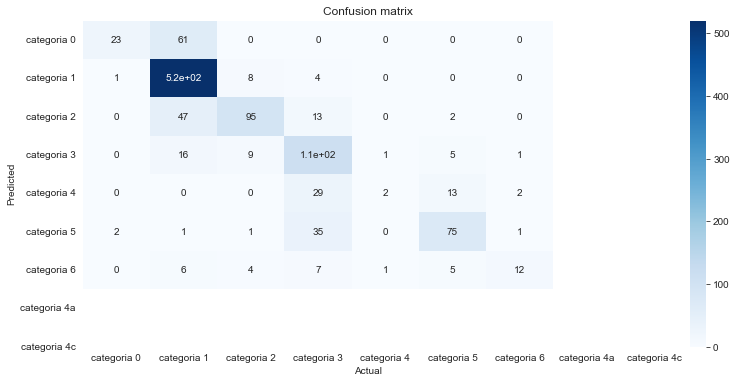

In [76]:
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)

acc = accuracy_score(labels_test, mnbc_pred)
f1 = f1_score(labels_test, mnbc_pred, average='macro')
print(classification_report(labels_test,mnbc_pred))

aux_df = df[['birads', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['birads'].values, 
            yticklabels=aux_df['birads'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [77]:
print("Cross-validation scores")
print("F1: %.3f - Accuracy: %.3f " % (round(np.mean(scores['test_F1']),3), round(np.mean(scores['test_Accuracy']),3)))
print('---------------------------')
print("Test scores")
print("F1: %.3f - Accuracy: %.3f " % (f1, acc))

Cross-validation scores
F1: 0.410 - Accuracy: 0.726 
---------------------------
Test scores
F1: 0.556 - Accuracy: 0.753 


In [78]:
d = {
     'Estimator': 'MultinomialNB',
     'Cross-validation Scores': (round(np.mean(scores['test_F1']),3), round(np.mean(scores['test_Accuracy']),3)),
     'Test Set Scores': (round(f1,3), round(acc,3))
}

df_estimators_scores = df_estimators_scores.append(d, ignore_index=True)

In [79]:
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.62, 0.867)","(0.787, 0.876)"
1,SVM,"(0.402, 0.648)","(0.519, 0.674)"
2,MultinomialNB,"(0.41, 0.726)","(0.556, 0.753)"


# Análise do melhor modelo

In [80]:
predictions = best_rfc.predict(features_test)

Criando dataframe dataframe do conjunto de testes com as categorias reais e previstas:

In [81]:
# Category mapping dictionary
category_codes = {
   #'sem categoria': 999,
    'categoria 0': 0,
    'categoria 1': 1,
    'categoria 2': 2,
    'categoria 3': 3,
    'categoria 4': 4,
    'categoria 4A': 41,
    'categoria 4B': 42,
    'categoria 4C': 43,
    'categoria 5': 5,
    'categoria 6': 6
}

category_names = {
    #999: 'sem categoria',
    0: 'categoria 0',
    1: 'categoria 1',
    2: 'categoria 2',
    3: 'categoria 3',
    4: 'categoria 4',
    41: 'categoria 4A',
    42: 'categoria 4B',
    43: 'categoria 4C',
    5: 'categoria 5',
    6: 'categoria 6'
}

# Indexes of the test set
index_X_test = X_test.index

# We get them from the original df
df_test = df.loc[index_X_test]

# Add the predictions
df_test['Prediction'] = predictions

# Clean columns
df_test = df_test[['texto_do_laudo_3', 'birads', 'Category_Code', 'Prediction']]

# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})

# Clean columns again
df_test = df_test[['texto_do_laudo_3', 'birads', 'Category_Predicted']]

In [82]:
df_test.head()

,texto_do_laudo_3,birads,Category_Predicted
4301,ressonancia magnetica mamaria indicacao clini...,categoria 6,categoria 6
5328,ressonancia magnetica mamaria indicacao clini...,categoria 5,categoria 4A
2661,ressonancia magnetica mamaria indicacao clini...,categoria 6,categoria 6
3053,ressonancia magnetica mamaria indicacao clinic...,categoria 4,categoria 4
3126,ressonancia magnetica mamaria indicacao clini...,categoria 2,categoria 2


Verificando laudos classificados corretamente:

In [83]:
condition = (df_test['birads'] == df_test['Category_Predicted'])

df_classified = df_test[condition]

df_classified.head(5)

,texto_do_laudo_3,birads,Category_Predicted
4301,ressonancia magnetica mamaria indicacao clini...,categoria 6,categoria 6
2661,ressonancia magnetica mamaria indicacao clini...,categoria 6,categoria 6
3053,ressonancia magnetica mamaria indicacao clinic...,categoria 4,categoria 4
3126,ressonancia magnetica mamaria indicacao clini...,categoria 2,categoria 2
2004,ressonancia magnetica mamaria indicacao clini...,categoria 2,categoria 2


Vamos pegar os artigos classificados incorretamente:

In [70]:
#condition = (df_test['birads'] != df_test['Category_Predicted'])

#df_misclassified = df_test[condition]

#df_misclassified.head(5)

Verificando amostra de Alguns laudos através de uma função para tornar o processo mais rápido:

In [84]:
def output_article(row_article):
    print('Actual Category: %s' %(row_article['birads']))
    print('Predicted Category: %s' %(row_article['Category_Predicted']))
    print('-------------------------------------------')
    print('Text: ')
    print('%s' %(row_article['texto_do_laudo_3']))

Selecionar índices corretos aleatoriamente:

In [85]:
import random

random.seed(1)
list_samples = random.sample(list(df_classified.index), 20)
list_samples

[718,
 5218,
 4870,
 5082,
 2168,
 288,
 1264,
 5611,
 941,
 4777,
 2334,
 248,
 3072,
 3934,
 2320,
 3480,
 6261,
 3632,
 729,
 3249]

Selecionar índices incorretos aleatoriamente:

In [86]:
#import random

#random.seed(1)
#list_samples = random.sample(list(df_misclassified.index), 20)
#list_samples

**Texto 1**

In [87]:
#output_article(df_misclassified.loc[list_samples[0]])

**Texto 2**

In [88]:
output_article(df_classified.loc[list_samples[11]])

Actual Category: categoria 2
Predicted Category: categoria 2
-------------------------------------------
Text: 
 ressonancia magnetica mamaria indicacao clinica  paciente realiza  presente estudo  esclarecimento diagnostico dados clinicos  exames anteriores mamografia  ultrassonografia   servico    classificacao br  aspectos tecnicos estudo realizado atraves  tecnicas fast spin echo short time inversion recovery stir echo planar imaging epi  dgradient echo vibrant  imagens obtidas  planos sagital  axial ponderadas  t  t  supressao  gordura alem  sequencia axial  tecnica  difusao apos  infusao venosa  meio  contraste paramagnetico  bolo  ml  realizado estudo dinamico  cinco fases sendo  primeira concluida antes  dois minutos  sequencias sagitais ponderadas  t  supressao  gordura tecnica vibrant  posprocessamento  exame  efetuado  workstation ge  estudo cinetico  lesoes identificadas achados pele  tecido celular subcutaneo  espessura  sinal preservados complexos areolomamilares estao int

**Texto 3**

In [ ]:
#output_article(df_misclassified.loc[list_samples[11]])